 # 1. Load the dataset in Python environment

In [1213]:
# import the following libraries into the Python environment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1214]:
# load data from a train_loan.csv into a pandas DataFrame object named `data

data=pd.read_csv('/content/train_loan.csv')

In [1215]:
# Displaying the first 5 rows of a DataFrame.it can help to get a quick overview of the data

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1216]:
data.shape        # understanding number of rows and columns in the dataset.

(614, 13)

In [1217]:
data.info()        #understanding the overall composition and quality of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1218]:
data.describe()      # obtain statistical information,understanding the distribution and central tendency

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


preprocessing steps

Step 1: Missing value handling

In [1219]:
data.isna().sum()     # identify the columns that have missing values.


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1220]:
data.dtypes      # obtain information about the data type of each variable

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [1221]:
# Fill missing values in each column of the dataset

# Choose an appropriate imputation method

In [1222]:
# "Gender" is a categorical column, mode imputation can be used.

data['Gender'].value_counts()   #obtain the frequency count for each unique value in the 'Gender' column,

Male      489
Female    112
Name: Gender, dtype: int64

In [1223]:
data['Gender']=data['Gender'].fillna("Male")      # filling the missing values in the 'Gender' column with the value "Male" (mode imputation).

In [1224]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [1225]:
data['Married']=data['Married'].fillna("Yes")     # "Married" is a categorical column(mode imputation)
                                                  # filling the missing values in the 'Married' column with the value "Yes"

In [1226]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [1227]:
data['Dependents']=data['Dependents'].fillna("0")          # "Dependents" is a categorical column(mode imputation)
                                                           # filling the missing values in the 'Dependents' column with the value "0"

In [1228]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [1229]:
data['Self_Employed']=data['Self_Employed'].fillna("No")     # Self_Employed" is a categorical column(mode imputation)
                                                             # filling the missing values in the 'Self_Employed' column with the value "No"                                                                                                                                 filling the missing values in the 'Married' column with the value "0"                                                                #

In [1230]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

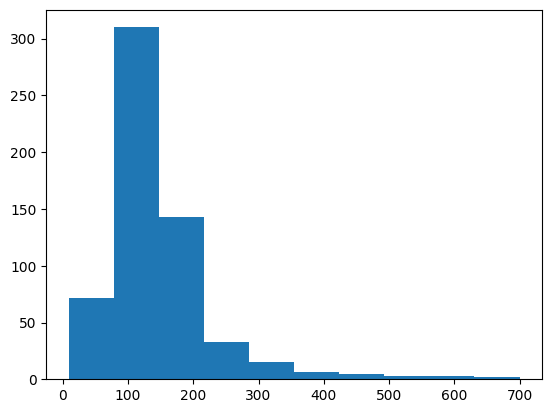

In [1231]:
# 'LoanAmount' is a numeric columns, we can consider mean or median imputation.

plt.hist(data['LoanAmount'])    # Histogram of the 'LoanAmount' column
plt.show()                      # identify any patterns of the loan amount distribution, such as whether it is skewed or normally distributed

In [1232]:

data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())   # Handling skewed 'LoanAmount' distribution with median


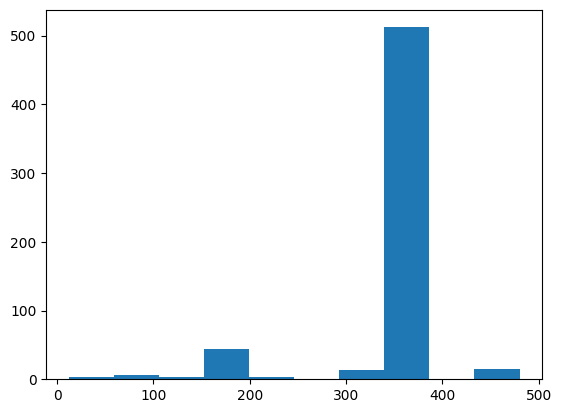

In [1233]:
plt.hist(data['Loan_Amount_Term'])
plt.show()

In [1234]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())   # Handling skewed 'LoanAmount' distribution with median


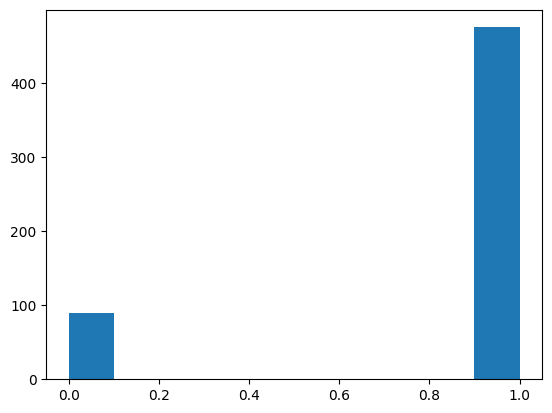

In [1235]:
plt.hist(data['Credit_History'])
plt.show()

In [1236]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())   # Handling skewed 'LoanAmount' distribution with median


In [1237]:
# successfully handled the missing data


data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Step 2: Outlier detection

In [1238]:
data.info()                         # understanding the overall composition of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1239]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1240]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


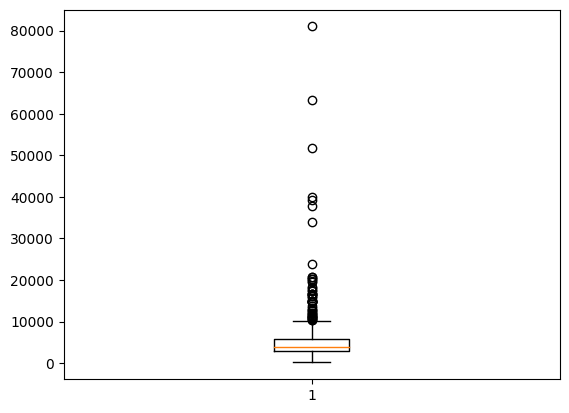

In [1241]:
 # Box plot for Applicant Income

plt.boxplot(data['ApplicantIncome'])       # identify any potential outliers in the distribution of applicant incomes
plt.show()

In [1242]:
# Handling outliers using Interquartile Range (IQR)


Q1=data['ApplicantIncome'].quantile(0.25)
Q2=data['ApplicantIncome'].quantile(0.5)
Q3=data['ApplicantIncome'].quantile(0.75)

In [1243]:
IQR=Q3-Q1

In [1244]:
 # Calculating upper and lower limits using Interquartile Range (IQR)

upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

In [1245]:
print(upper,lower)

10171.25 -1498.75


In [1246]:
data[(data['ApplicantIncome']<lower)|(data['ApplicantIncome']>upper)].index   #return the index of the rows(index of outliers of 'ApplicantIncome')

Int64Index([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
            146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
            324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
            487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604],
           dtype='int64')

In [1247]:
# Remove the outliers by dropping the corresponding rows:

data=data.drop([9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
            146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
            324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
            487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604])

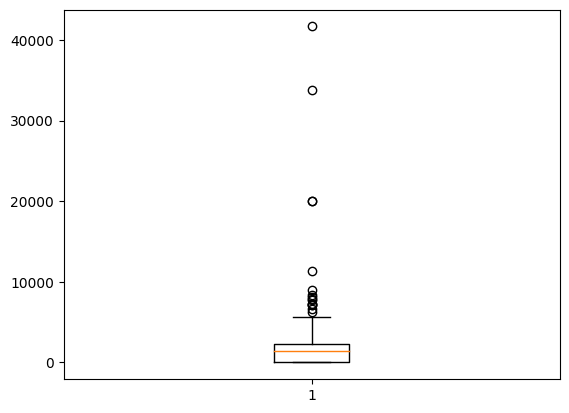

In [1248]:
 # Box plot for CoapplicantIncome

plt.boxplot(data['CoapplicantIncome'])     # identify any potential outliers in the distribution of CoapplicantIncome
plt.show()

In [1251]:
# Handling outliers using Interquartile Range (IQR)

Q1=data['CoapplicantIncome'].quantile(0.25)
Q2=data['CoapplicantIncome'].quantile(0.5)
Q3=data['CoapplicantIncome'].quantile(0.75)

In [1252]:
IQR=Q3-Q1

In [1254]:
# Calculating upper and lower limits using Interquartile Range (IQR)

upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

In [1255]:
print(upper,lower)

5842.5 -3505.5


In [1256]:
data[(data['CoapplicantIncome']<lower)|(data['CoapplicantIncome']>upper)].index      #return the index of the rows(index of outliers of 'CoapplicantIncome')

Int64Index([12, 38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444, 513, 523,
            581, 600],
           dtype='int64')

In [1257]:
# Remove the outliers by dropping the corresponding rows:

data=data.drop([12, 38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444, 513, 523,
            581, 600])

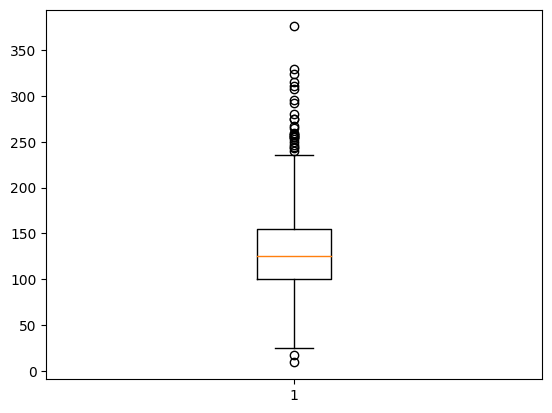

In [1258]:
plt.boxplot(data['LoanAmount'])
plt.show()

In [1259]:
Q1=data['LoanAmount'].quantile(0.25)
Q2=data['LoanAmount'].quantile(0.5)
Q3=data['LoanAmount'].quantile(0.75)

In [1260]:
IQR=Q3-Q1

In [1261]:
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

In [1262]:
print(upper,lower)

237.5 17.5


In [1263]:
data[(data['LoanAmount']<lower)|(data['LoanAmount']>upper)].index

Int64Index([  5,  14,  21,  65,  83, 152, 159, 161, 212, 233, 236, 255, 260,
            325, 348, 351, 381, 391, 484, 505, 511, 514, 536, 557, 564, 568,
            592, 611],
           dtype='int64')

In [1264]:
data=data.drop([5,  14,  21,  65,  83, 152, 159, 161, 212, 233, 236, 255, 260,
            325, 348, 351, 381, 391, 484, 505, 511, 514, 536, 557, 564, 568,
            592, 611])

In [1265]:
data['LoanAmount'].describe()

count    520.000000
mean     123.651923
std       39.749892
min       25.000000
25%      100.000000
50%      123.000000
75%      150.000000
max      236.000000
Name: LoanAmount, dtype: float64

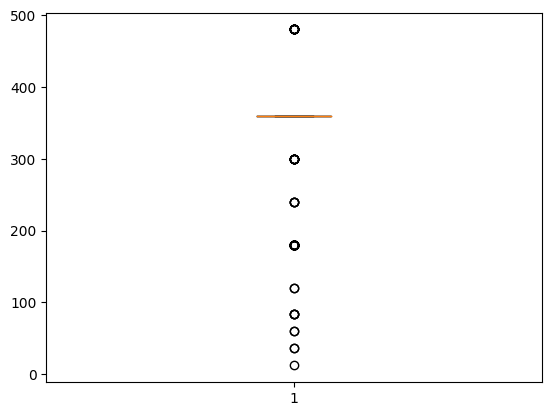

In [1266]:
plt.boxplot(data['Loan_Amount_Term'])
plt.show()

In [1267]:
Q1=data['Loan_Amount_Term'].quantile(0.25)
Q2=data['Loan_Amount_Term'].quantile(0.5)
Q3=data['Loan_Amount_Term'].quantile(0.75)

In [1000]:
IQR=Q3-Q1

In [1268]:
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

In [1002]:
print(upper,lower)

360.0 360.0


In [1269]:
data[(data['Loan_Amount_Term']<lower)|(data['Loan_Amount_Term']>upper)].index

Int64Index([ 16,  62,  66,  68,  75,  84,  91,  94,  98, 100, 109, 133, 142,
            164, 168, 172, 179, 182, 189, 202, 228, 231, 241, 242, 245, 247,
            248, 262, 282, 293, 298, 313, 315, 334, 355, 358, 366, 373, 375,
            378, 385, 393, 400, 429, 435, 453, 461, 466, 471, 495, 497, 500,
            516, 539, 540, 546, 554, 573, 575, 585, 590, 591, 593, 605, 610],
           dtype='int64')

In [1270]:
data=data.drop([16,  62,  66,  68,  72,  75,  78,  84,  91,  94,  98, 100, 109,
            133, 142, 164, 168, 172, 179, 182, 186, 189, 202, 228, 231, 241,
            242, 245, 247, 248, 262, 282, 286, 293, 298, 313, 315, 334, 355,
            358, 363, 366, 373, 375, 378, 385, 393, 400, 401, 408, 429, 435,
            451, 453, 461, 466, 471, 476, 495, 497, 500, 504, 516, 539, 540,
            546, 554, 573, 575, 585, 590, 591, 593, 605, 610])

In [1271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            445 non-null    object 
 1   Gender             445 non-null    object 
 2   Married            445 non-null    object 
 3   Dependents         445 non-null    object 
 4   Education          445 non-null    object 
 5   Self_Employed      445 non-null    object 
 6   ApplicantIncome    445 non-null    int64  
 7   CoapplicantIncome  445 non-null    float64
 8   LoanAmount         445 non-null    float64
 9   Loan_Amount_Term   445 non-null    float64
 10  Credit_History     445 non-null    float64
 11  Property_Area      445 non-null    object 
 12  Loan_Status        445 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 48.7+ KB


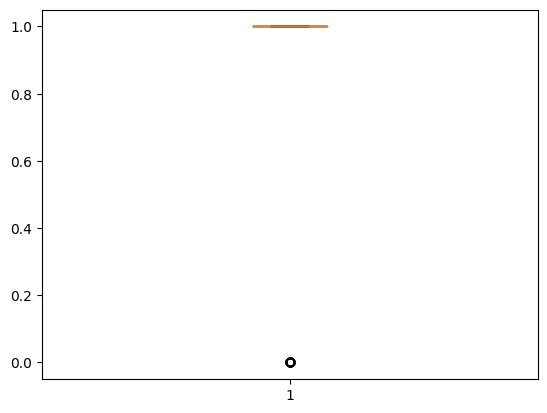

In [1272]:
plt.boxplot(data['Credit_History'])
plt.show()

In [1273]:
Q1=data['Credit_History'].quantile(0.25)
Q2=data['Credit_History'].quantile(0.5)
Q3=data['Credit_History'].quantile(0.75)

In [1274]:
IQR=Q3-Q1

In [1275]:
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

In [1276]:
print(upper,lower)

1.0 1.0


In [1277]:
data[(data['Credit_History']<lower)|(data['Credit_History']>upper)].index

Int64Index([  7,  17,  20,  22,  23,  36,  48,  63,  64,  69,  73, 108, 112,
            150, 162, 201, 211, 218, 220, 250, 256, 267, 280, 291, 300, 307,
            326, 338, 346, 353, 367, 387, 396, 399, 412, 414, 421, 423, 431,
            448, 450, 452, 464, 477, 486, 494, 499, 517, 527, 532, 541, 548,
            550, 553, 567, 569, 571, 576, 584, 589, 597, 613],
           dtype='int64')

In [1278]:
data=data.drop([7,  17,  20,  22,  23,  36,  48,  63,  64,  69,  73, 108, 112,
            150, 162, 201, 211, 218, 220, 250, 256, 267, 280, 291, 300, 307,
            326, 338, 346, 353, 367, 387, 396, 399, 412, 414, 421, 423, 431,
            448, 450, 452, 464, 477, 486, 494, 499, 517, 527, 532, 541, 548,
            550, 553, 567, 569, 571, 576, 584, 589, 597, 613])


In [ ]:
# successfully handled Outliers

Step 3: Encoding

In [ ]:
 # converting categorical data into numerical values

In [1280]:
# find the categorical columns

data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [1281]:
data['Loan_ID'].value_counts()

LP001002    1
LP002236    1
LP002284    1
LP002281    1
LP002272    1
           ..
LP001665    1
LP001664    1
LP001658    1
LP001657    1
LP002984    1
Name: Loan_ID, Length: 383, dtype: int64

In [1282]:
data['Loan_ID']=data['Loan_ID'].str.replace('LP',' ')  # replaces the substring 'LP' in the 'Loan_ID' column with a space.

In [1283]:
data['Loan_ID']=data['Loan_ID'].astype('int32')        # Convert the 'Loan_ID' column to integer type

In [1284]:
data.dtypes

Loan_ID                int32
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [1285]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1287]:
data['Married'].value_counts()

Yes    245
No     138
Name: Married, dtype: int64

In [1288]:
data['Education'].value_counts()

Graduate        297
Not Graduate     86
Name: Education, dtype: int64

In [1289]:
data['Self_Employed'].value_counts()

No     339
Yes     44
Name: Self_Employed, dtype: int64

In [1290]:
data['Property_Area'].value_counts()

Semiurban    149
Rural        121
Urban        113
Name: Property_Area, dtype: int64

In [1291]:
data['Dependents'].value_counts()

0     239
2      62
1      59
3+     23
Name: Dependents, dtype: int64

In [1292]:
data['Dependents']=data['Dependents'].str.replace('+',' ')  # replaces the substring '+' in the 'Dependents' column with a space.

<ipython-input-1292-506dbb32c9dd>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents']=data['Dependents'].str.replace('+',' ')  # replaces the substring '+' in the 'Dependents' column with a space.


In [1293]:
data['Dependents']=data['Dependents'].astype('int32')        # Convert the 'Loan_ID' column to integer type

In [1294]:
data.dtypes

Loan_ID                int32
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [1295]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1030]:
# using ONEHOT Encoding


data = pd.get_dummies(data)         # create new binary columns for each unique value in the specified column in the dataset


In [1031]:
successfully encoded the data

data.dtypes

Loan_ID                      int32
Dependents                   int32
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Loan_Status_N                uint8
Loan_Status_Y                uint8
dtype: object

In [1032]:
data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,1002,0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1,0,1
1,1003,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0,1,0
2,1005,0,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1,0,1
3,1006,0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1,0,1
4,1008,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1,0,1


## Step 4: Scaling

In [1033]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [1034]:
data.loc[:,['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]=sc.fit_transform(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])


In [1035]:
data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,1002,0,1.033966,-0.969937,0.077480,0.0,1.0,0,1,1,0,1,0,1,0,0,0,1,0,1
1,1003,1,0.331392,0.119523,0.077480,0.0,1.0,0,1,0,1,1,0,1,0,1,0,0,1,0
2,1005,0,-0.547102,-0.969937,-1.488350,0.0,1.0,0,1,0,1,1,0,0,1,0,0,1,0,1
3,1006,0,-0.778518,0.733609,-0.124562,0.0,1.0,0,1,0,1,0,1,1,0,0,0,1,0,1
4,1008,0,1.117764,-0.969937,0.405800,0.0,1.0,0,1,1,0,1,0,1,0,0,0,1,0,1


# test data - preprocessing

In [1036]:
# load data from a train_loan.csv into a pandas DataFrame object named `data

test_data=pd.read_csv('/content/test_loan.csv')

In [1037]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [1038]:
test_data.shape

(367, 12)

In [1039]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [1040]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# preprocessing steps

Step 1: Missing value handling

In [1041]:
test_data.isna().sum()  # find missing values

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [1042]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [1048]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [1044]:
test_data['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [1050]:

test_data['Gender']=test_data['Gender'].fillna("Male")

In [1051]:
test_data['Married'].value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [1052]:
test_data['Married']=test_data['Married'].fillna("Yes")

In [1053]:
test_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [1054]:
test_data['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [1055]:
test_data['Dependents']=test_data['Dependents'].fillna("0")

In [1056]:
test_data['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [1057]:
test_data['Self_Employed']=test_data['Self_Employed'].fillna("No")

In [1058]:
test_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

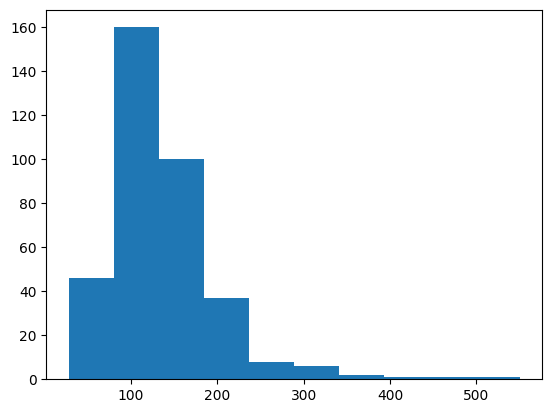

In [1059]:
plt.hist(test_data['LoanAmount'])
plt.show()

In [1060]:
test_data['LoanAmount']=test_data['LoanAmount'].fillna(data['LoanAmount'].median())

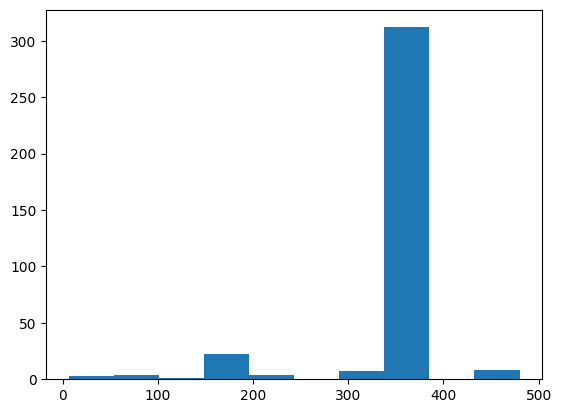

In [1061]:
plt.hist(test_data['Loan_Amount_Term'])
plt.show()

In [1062]:
test_data['Loan_Amount_Term']=test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median())

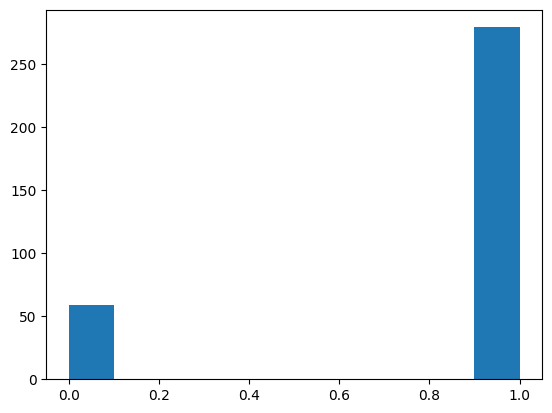

In [1063]:
plt.hist(test_data['Credit_History'])
plt.show()

In [1064]:
test_data['Credit_History']=test_data['Credit_History'].fillna(test_data['Credit_History'].median())

In [1065]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Step 2: Outlier detection

In [1066]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [1067]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,134.277953,342.822888,0.839237
std,4910.685399,2334.232099,62.961376,64.658402,0.367814
min,0.000000,0.000000,0.001714,6.000000,0.000000
25%,2864.000000,0.000000,100.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


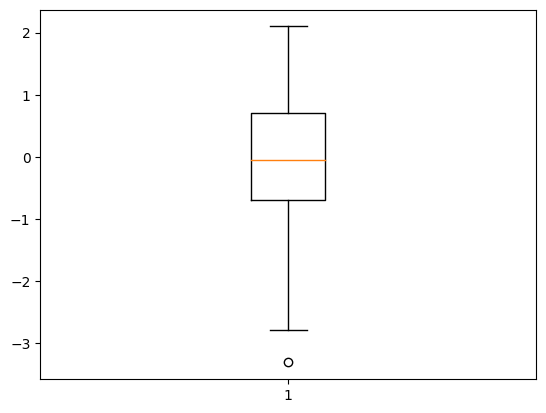

In [1296]:
plt.boxplot(test_data['ApplicantIncome'])
plt.show()

In [1069]:
# Handling Outlier

Q1=test_data['ApplicantIncome'].quantile(0.25)
Q2=test_data['ApplicantIncome'].quantile(0.5)
Q3=test_data['ApplicantIncome'].quantile(0.75)

In [1070]:
IQR=Q3-Q1

In [1071]:
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

In [1072]:
print(upper,lower)

8354.0 -430.0


In [1073]:
test_data[(test_data['ApplicantIncome']<lower)|(test_data['ApplicantIncome']>upper)].index

Int64Index([  8,  13,  18,  81,  83,  91,  98, 124, 143, 144, 145, 147, 179,
            184, 187, 188, 194, 200, 230, 247, 263, 272, 279, 283, 284, 285,
            302, 323, 331, 350, 360, 366],
           dtype='int64')

In [1074]:
test_data=test_data.drop([ 8,  13,  18,  27,  31,  36,  43,  48,  49,  61,  68,  77,  79,
             81,  83,  91,  95,  98,  99, 124, 126, 127, 142, 143, 144, 145,
            147, 159, 179, 184, 187, 188, 189, 194, 200, 217, 230, 233, 237,
            247, 263, 272, 276, 279, 283, 284, 285, 289, 296, 300, 301, 302,
            306, 308, 315, 323, 328, 331, 344, 345, 350, 355, 360, 366])

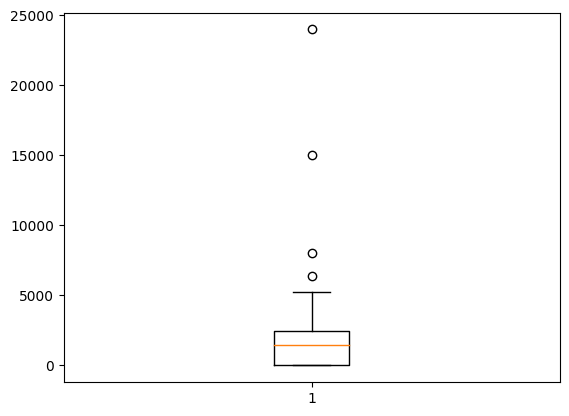

In [1075]:
plt.boxplot(test_data['CoapplicantIncome'])
plt.show()

In [1076]:
# Handling Outlier

Q1=test_data['CoapplicantIncome'].quantile(0.25)
Q2=test_data['CoapplicantIncome'].quantile(0.5)
Q3=test_data['CoapplicantIncome'].quantile(0.75)

In [1077]:
IQR=Q3-Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
print(upper,lower)

6217.5 -3730.5


In [1079]:
test_data[(test_data['CoapplicantIncome']<lower)|(test_data['CoapplicantIncome']>upper)].index

Int64Index([25, 85, 123, 351], dtype='int64')

In [1080]:
test_data=test_data.drop([25, 85, 123, 351])

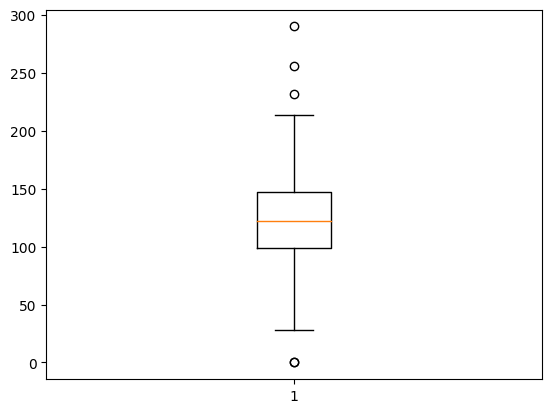

In [1082]:
plt.boxplot(test_data['LoanAmount'])
plt.show()

In [1083]:
# Handling Outlier

Q1=test_data['LoanAmount'].quantile(0.25)
Q2=test_data['LoanAmount'].quantile(0.5)
Q3=test_data['LoanAmount'].quantile(0.75)

In [1084]:
IQR=Q3-Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
print(upper,lower)

219.0 27.0


In [1085]:
test_data[(test_data['LoanAmount']<lower)|(test_data['LoanAmount']>upper)].index

Int64Index([24, 73, 78, 96, 101], dtype='int64')

In [ ]:
test_data=test_data.drop([24, 73, 78, 96, 101])

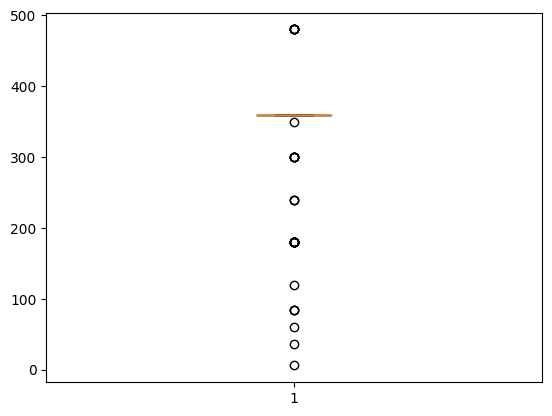

In [1086]:
plt.boxplot(test_data['Loan_Amount_Term'])
plt.show()

In [1087]:
# Handling Outlier

Q1=test_data['Loan_Amount_Term'].quantile(0.25)
Q2=test_data['Loan_Amount_Term'].quantile(0.5)
Q3=test_data['Loan_Amount_Term'].quantile(0.75)

In [1088]:
IQR=Q3-Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
print(upper,lower)

360.0 360.0


In [1089]:
test_data[(test_data['Loan_Amount_Term']<lower)|(test_data['Loan_Amount_Term']>upper)].index

Int64Index([ 12,  19,  21,  29,  53,  57,  59,  72,  82,  84, 101, 103, 128,
            134, 141, 155, 157, 164, 173, 190, 215, 216, 222, 223, 232, 239,
            245, 249, 250, 251, 266, 277, 295, 312, 314, 322, 325, 338, 340,
            342, 349, 354],
           dtype='int64')

In [1090]:
test_data=test_data.drop([ 12,  19,  21,  29,  53,  57,  59,  72,  82,  84, 101, 103, 128,
            134, 141, 155, 157, 164, 173, 190, 215, 216, 222, 223, 232, 239,
            245, 249, 250, 251, 266, 277, 295, 312, 314, 322, 325, 338, 340,
            342, 349, 354])

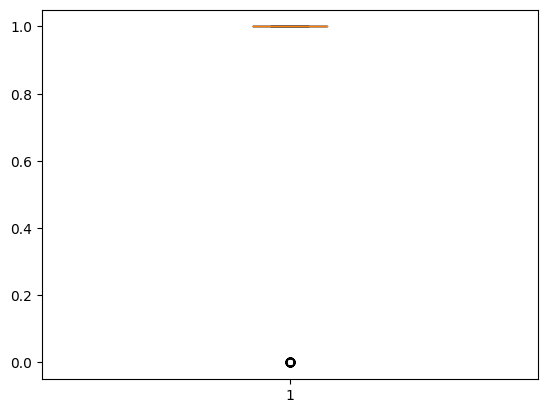

In [1091]:
plt.boxplot(test_data['Credit_History'])
plt.show()

In [1092]:
# Handling Outlier

Q1=test_data['Credit_History'].quantile(0.25)
Q2=test_data['Credit_History'].quantile(0.5)
Q3=test_data['Credit_History'].quantile(0.75)

In [1093]:
IQR=Q3-Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
print(upper,lower)

1.0 1.0


In [1094]:
test_data[(test_data['Credit_History']<lower)|(test_data['Credit_History']>upper)].index

Int64Index([  7,  35,  55,  58,  63,  66,  67,  69,  80,  94, 106, 117, 118,
            119, 140, 153, 161, 165, 166, 168, 174, 192, 193, 196, 198, 211,
            224, 229, 235, 236, 241, 243, 255, 268, 273, 274, 278, 293, 311,
            317, 339, 346],
           dtype='int64')

In [1095]:
test_data=test_data.drop([ 7,  35,  55,  58,  63,  66,  67,  69,  80,  94, 106, 117, 118,
            119, 140, 153, 161, 165, 166, 168, 174, 192, 193, 196, 198, 211,
            224, 229, 235, 236, 241, 243, 255, 268, 273, 274, 278, 293, 311,
            317, 339, 346])

step :3 Encoding

In [1099]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [1100]:
test_data['Loan_ID'].unique

<bound method Series.unique of 0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
361    LP002969
362    LP002971
363    LP002975
364    LP002980
365    LP002986
Name: Loan_ID, Length: 215, dtype: object>

In [1101]:
test_data['Loan_ID']=test_data['Loan_ID'].str.replace('LP',' ')

In [1104]:
test_data['Loan_ID']=test_data['Loan_ID'].astype('int32')


In [1105]:
test_data.dtypes

Loan_ID                int32
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [1106]:
test_data['Dependents'].unique

<bound method Series.unique of 0       0
1       1
2       2
3       2
4       0
       ..
361     1
362    3+
363     0
364     0
365     0
Name: Dependents, Length: 215, dtype: object>

In [1107]:
test_data['Dependents'].value_counts()

0     132
1      38
2      32
3+     13
Name: Dependents, dtype: int64

In [1108]:
test_data['Dependents']=test_data['Dependents'].str.replace('+',' ')

<ipython-input-1108-f1afa6e05c0a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_data['Dependents']=test_data['Dependents'].str.replace('+',' ')


In [1109]:
test_data['Dependents']=test_data['Dependents'].astype('int32')

In [1110]:
test_data.dtypes

Loan_ID                int32
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [1111]:
# using ONE HOT Encoding
test_data = pd.get_dummies(test_data)

In [1112]:
test_data.dtypes

Loan_ID                      int32
Dependents                   int32
ApplicantIncome              int64
CoapplicantIncome            int64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

Step 4: Scaling

In [1113]:
test_data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1015,0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
1,1022,1,3076,1500,126.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
2,1031,2,5000,1800,208.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
3,1035,2,2340,2546,100.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
4,1051,0,3276,0,78.0,360.0,1.0,0,1,1,0,0,1,1,0,0,0,1


In [1114]:
test_data.loc[:,['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]=sc.fit_transform(test_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

In [1115]:
test_data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1015,0,1.932659,-1.020149,-0.370727,0.0,1.0,0,1,0,1,1,0,1,0,0,0,1
1,1022,1,-0.488713,0.028845,0.030059,0.0,1.0,0,1,0,1,1,0,1,0,0,0,1
2,1031,2,1.273284,0.238644,2.084087,0.0,1.0,0,1,0,1,1,0,1,0,0,0,1
3,1035,2,-1.162741,0.760343,-0.621219,0.0,1.0,0,1,0,1,1,0,1,0,0,0,1
4,1051,0,-0.305553,-1.020149,-1.172299,0.0,1.0,0,1,1,0,0,1,1,0,0,0,1
